In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import yfinance as yf
import datetime
import time

# GS,HD, DE, AMXL.MX

style.use('seaborn')

#importing data
tickers = ['AMXL.MX']
ticker = 'AMXL.MX'
start = '2015-12-31'
end = datetime.datetime.now().date().isoformat()         # today
prices_df = yf.download(' '.join(tickers), start, end)['Adj Close']
returns_df = prices_df.pct_change()[1:]

[*********************100%***********************]  16 of 16 completed
[*********************100%***********************]  16 of 16 completed


In [25]:
prices_df=pd.DataFrame(prices_df)
prices_df

,AC.MX,ALSEA.MX,AMXL.MX,BA,BAX,BBAJIOO.MX,BBQ,BIMBOA.MX,CNP,CVX,DE,GS,HD,MFRISCOA-1.MX,MSFT,NMRK
Date,,,,,,,,,,,,,,,,
2016-01-04,8415.1604%,5705.7350%,1000.4261%,12600.5173%,3430.0797%,NaN,686.0000%,4154.3461%,1429.7386%,6621.1914%,6758.2634%,15667.9947%,11215.2992%,823.0000%,4926.9146%,NaN
2016-01-05,8335.2066%,5752.2091%,995.4367%,12651.6327%,3443.9220%,NaN,621.0000%,4223.5542%,1443.0424%,6677.8244%,6797.3488%,15398.2208%,11160.5377%,825.0000%,4949.3912%,NaN
2016-01-06,8448.9571%,5730.9082%,976.3096%,12450.7408%,3452.2266%,NaN,657.0000%,4242.0094%,1425.0433%,6414.0198%,6720.9526%,15022.3145%,11045.0203%,832.0000%,4859.4849%,NaN
2016-01-07,8338.5033%,5512.0903%,943.0451%,11928.7827%,3395.0127%,NaN,658.0000%,4261.3880%,1396.8713%,6186.7313%,6661.4380%,14560.6094%,10730.1353%,832.0000%,4690.4591%,NaN
2016-01-08,8331.0860%,5493.6939%,908.1178%,11657.9384%,3340.5670%,NaN,637.0000%,4296.4539%,1393.7411%,6120.4105%,6552.1721%,14500.4578%,10601.7815%,812.0000%,4704.8450%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-12,14124.0005%,3875.0000%,1749.0000%,15872.0001%,5977.9999%,4658.0002%,1720.0001%,7369.9997%,3309.9998%,16250.0000%,37402.9999%,34257.9987%,29754.0009%,289.0000%,26664.9994%,1062.0000%
2022-09-13,13936.9995%,3856.0001%,1711.0001%,14730.9998%,5813.0001%,4622.0001%,1720.0001%,7302.9999%,3234.9998%,15941.0004%,36329.9988%,32839.0015%,27792.9993%,290.0000%,25199.0005%,1027.0000%
2022-09-14,13938.0005%,3870.9999%,1700.0000%,14925.9995%,5911.0001%,4734.9998%,1720.9999%,7265.0002%,3275.0000%,16327.0004%,36089.9994%,32726.0010%,27633.9996%,290.0000%,25222.0001%,1033.0000%


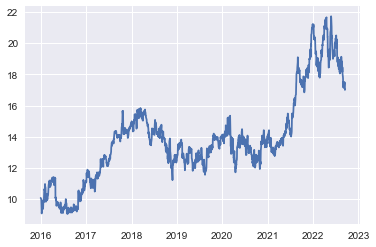

In [3]:
plt.figure()
plt.plot(prices_df)
plt.show()

In [4]:
df_week = prices_df.groupby(pd.PeriodIndex(prices_df.index, freq='W')).mean()
df_week = df_week[['Adj Close']]
df_week.head()

,Adj Close
Date,
2015-12-28/2016-01-03,10.079106
2016-01-04/2016-01-10,9.646671
2016-01-11/2016-01-17,9.468707
2016-01-18/2016-01-24,9.575153
2016-01-25/2016-01-31,10.220482


In [5]:
df_week['weekly_ret'] = np.log(df_week['Adj Close']).diff()
df_week.head()

,Adj Close,weekly_ret
Date,,
2015-12-28/2016-01-03,10.079106,NaN
2016-01-04/2016-01-10,9.646671,-0.043852
2016-01-11/2016-01-17,9.468707,-0.018621
2016-01-18/2016-01-24,9.575153,0.011179
2016-01-25/2016-01-31,10.220482,0.065222


In [6]:
# drop null rows
df_week.dropna(inplace=True)

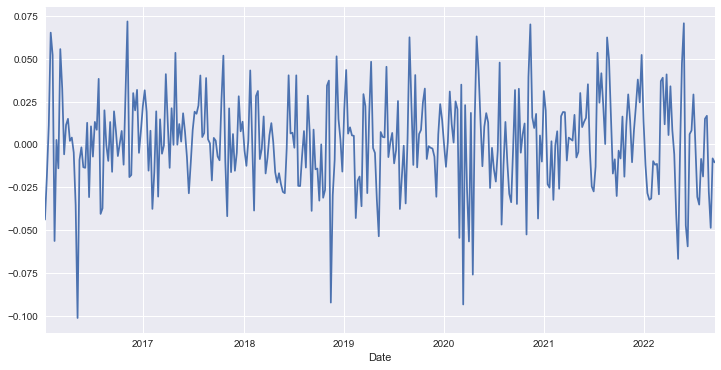

In [7]:
df_week.weekly_ret.plot(kind='line', figsize=(12, 6));

In [8]:
udiff = df_week.drop(['Adj Close'], axis=1)
udiff.head()

,weekly_ret
Date,
2016-01-04/2016-01-10,-0.043852
2016-01-11/2016-01-17,-0.018621
2016-01-18/2016-01-24,0.011179
2016-01-25/2016-01-31,0.065222
2016-02-01/2016-02-07,0.052117


In [9]:
udiff.index=udiff.index.astype(str)

In [10]:
udiff.index.dtype

dtype('O')

# Test for stationarity of the udiff series

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [27]:
rolmean = udiff.rolling(20).mean()
rolstd = udiff.rolling(20).std()
print(rolmean)
print(rolstd)

                       weekly_ret
Date                             
2016-01-04/2016-01-10         NaN
2016-01-11/2016-01-17         NaN
2016-01-18/2016-01-24         NaN
2016-01-25/2016-01-31         NaN
2016-02-01/2016-02-07         NaN
...                           ...
2022-08-15/2022-08-21    -0.4121%
2022-08-22/2022-08-28    -0.7195%
2022-08-29/2022-09-04    -1.0043%
2022-09-05/2022-09-11    -1.0166%
2022-09-12/2022-09-18    -0.8649%

[350 rows x 1 columns]
                       weekly_ret
Date                             
2016-01-04/2016-01-10         NaN
2016-01-11/2016-01-17         NaN
2016-01-18/2016-01-24         NaN
2016-01-25/2016-01-31         NaN
2016-02-01/2016-02-07         NaN
...                           ...
2022-08-15/2022-08-21     3.5628%
2022-08-22/2022-08-28     3.4816%
2022-08-29/2022-09-04     3.5799%
2022-09-05/2022-09-11     3.5787%
2022-09-12/2022-09-18     3.5056%

[350 rows x 1 columns]


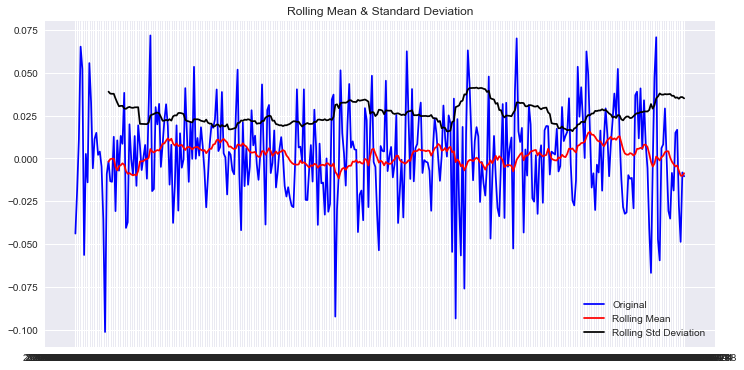

In [13]:
plt.figure(figsize=(12, 6))
orig = plt.plot(udiff, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

In [14]:
# Perform Dickey-Fuller test
dftest = sm.tsa.adfuller(udiff.weekly_ret, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value ({0})'.format(key)] = value
    
dfoutput

Test Statistic                -1.358756e+01
p-value                        2.066334e-25
#Lags Used                     1.000000e+00
Number of Observations Used    3.480000e+02
Critical Value (1%)           -3.449282e+00
Critical Value (5%)           -2.869881e+00
Critical Value (10%)          -2.571214e+00
dtype: float64

# ACF and PACF Charts

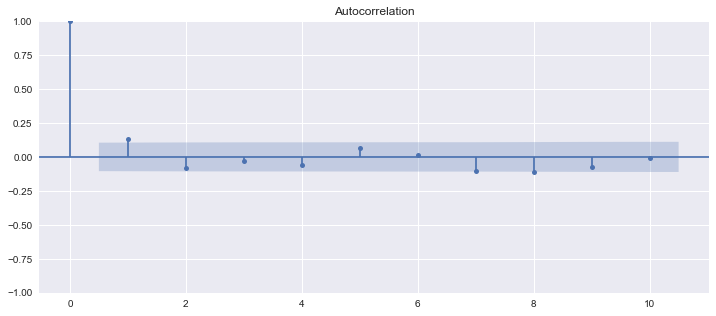

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

# the autocorrelation chart provides just the correlation at increasing lags
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(udiff.values, lags=10, ax=ax)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


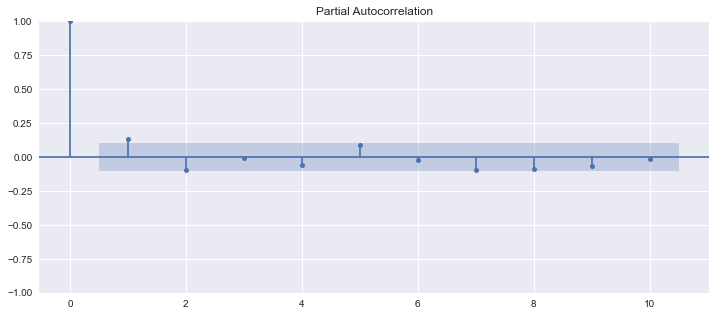

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(udiff.values, lags=10, ax=ax)
plt.show()

# Build ARIMA Model

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Notice that you have to use udiff - the differenced data rather than the original data. 
# ar1 = # TODO: Fit an ARIMA model to the differenced data
ar1 = ARIMA(udiff.values,order=(3,0,1)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  350
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 768.955
Date:                Sun, 18 Sep 2022   AIC                          -1525.909
Time:                        21:38:52   BIC                          -1502.761
Sample:                             0   HQIC                         -1516.695
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.002      0.973      0.331      -0.002       0.005
ar.L1          0.0644      8.113      0.008      0.994     -15.837      15.966
ar.L2         -0.0854      1.142     -0.075      0.940      -2.323       2.152
ar.L3         -0.0140      0.779     -0.018      0.986      -1.540       1.512
ma.L1          0.0750      8.121      0.009      0.993     -15.842      15.992
sigma2         0.0007   4.62e-05     15.645      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                23.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.39
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

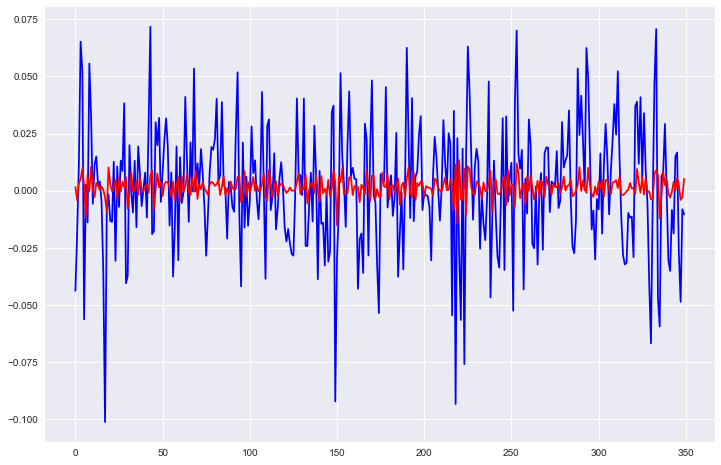

In [18]:
# TODO: Plot the ARMA fitted values on the same plot as the differenced time series
plt.figure(figsize=(12,8))
plt.plot(udiff.values,color='blue')
preds=ar1.fittedvalues
plt.plot(preds,color='red')
plt.show()

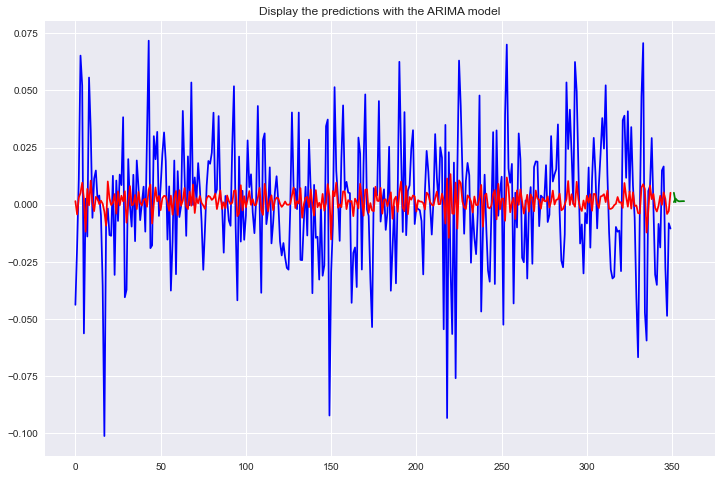

In [19]:
#forecast = # TODO: Use the ARMA model to create a forecast two weeks into the future
steps=7

forecast=ar1.forecast(steps=steps)

plt.figure(figsize=(12, 8))
plt.plot(udiff.values, color='blue')

preds = ar1.fittedvalues
plt.plot(preds, color='red')

plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(udiff.values)+1, len(udiff.values)+3)), color='green')
plt.plot(pd.DataFrame(forecast,index=range(len(udiff.values)+1, len(udiff.values)+1+steps)), color='green')
plt.title('Display the predictions with the ARIMA model')
plt.show()

In [20]:
forecast

array([0.0011016 , 0.00265052, 0.00179507, 0.00144587, 0.00147473,
       0.00151837, 0.00152361])

In [21]:
l=pd.DataFrame(forecast,index=range(len(udiff.values)+1, len(udiff.values)+1+steps))

In [22]:
l

,0
351,0.001102
352,0.002651
353,0.001795
354,0.001446
355,0.001475
356,0.001518
357,0.001524


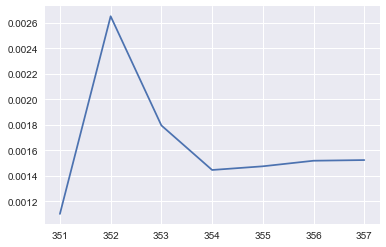

In [23]:
plt.figure()
plt.plot(l)
plt.show()